In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def import_unicorn_comp():
    return pd.read_csv('Unicorn_Companies.csv')

In [4]:
pd.set_option('display.max_columns',20)

In [5]:
df = import_unicorn_comp()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Identify the number of rows and columns

In [6]:
df.shape

(1074, 10)

**Question:** How many rows and columns are in the dataset? How many unicorn companies are there? How many aspects are shown for each company?

- There are 1074 rows and 10 columns in the dataset.
- According to this dataset, there are 1074 unicorn companies, as of March 2022. 
- This dataset shows 10 aspects of each company. 

## Check for duplicates 

In [7]:
df.shape

(1074, 10)

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates().shape

(1074, 10)

**Question:** Based on the preceding output, are there any duplicates in the dataset?

there is no duplicate in the dataset , and the numbers deosnt change

### Display the datatypes of the columns

Knowing the data types of the columns is helpful because it indicates what types of analysis and aggregation can be done, how a column can be transformed to suit specific tasks, and so on. Display the data types of the columns.

In [10]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

**Question:** What do you notice about the data types of the columns in the dataset?

- The data type of the `Year Founded` column is `int64`. 
- The rest of the columns have the data type `object`.

**Question:** How would you sort this dataset in order to get insights about when the companies were founded? Then, how would you arrange the data from companies that were founded the earliest to companies that were founded the latest?

In [11]:
df.sort_values('Year Founded',ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


### Determine the number of companies founded each year

In [12]:
df.value_counts('Year Founded')

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
2004      8
2003      8
1999      8
1998      5
2002      4
1995      2
1994      2
1979      1
1997      1
1996      1
1993      1
1992      1
1991      1
1990      1
1984      1
1919      1
dtype: int64

In [13]:
df.value_counts(['Year Founded','Company']).reset_index()

,Year Founded,Company,0
0,1919,Otto Bock HealthCare,1
1,2015,Timescale,1
2,2015,Sennder,1
3,2015,ShareChat,1
4,2015,Shield AI,1
...,...,...,...
1069,2012,OpenWeb,1
1070,2012,Paxos,1
1071,2012,Plaid,1
1072,2012,QuintoAndar,1


**Question:** What do you observe from the counts of the unique `Year Founded` values in the dataset?

- `2015` has the highest count. This indicates that `2015` is the year when the largest number of companies in this dataset were founded.

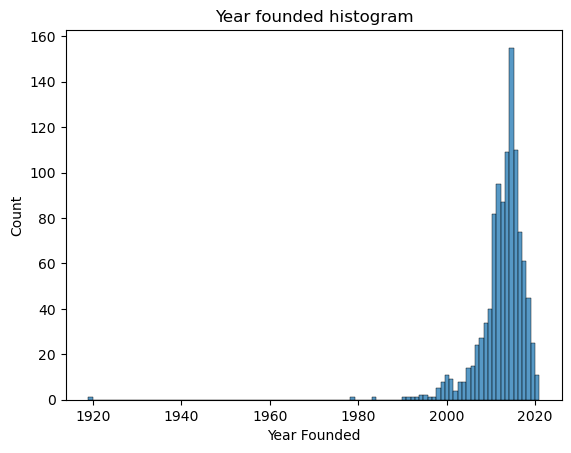

In [14]:
sns.histplot(data=df, x='Year Founded')
plt.title('Year founded histogram');

# Convert the `Date Joined` column to datetime


In [15]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [16]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

### Create a `Month Joined` column

In [17]:
df.head(1)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."


In [18]:
df['Month Joined'] = df['Date Joined'].dt.month_name()

In [19]:
df.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


# Create a Years To Join column

In [20]:
df['Years To Join'] = df['Date Joined'].dt.year - df['Year Founded']

In [21]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [22]:
companies_2021 = df[df['Date Joined'].dt.year == 2021]
companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


**Question:** Using a time interval, how could you observe trends in the companies that became unicorns in one year?

- First, identify a time interval of your choice. Then, take the subset that consists of the data for the year of interest, create a column that contains the time interval that each data point belongs to (as needed), group by that column, and count the number of companies that joined per interval. 
  - For example, if a subset consisted of companies that joined in 2021, create a column that corresponds to week joined, group by week, and count the number of companies that joined per week. This allows the observation of trends over the weeks of 2021. 

In [23]:
# Insert a `Week Joined` column into `companies_2021.`
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})
companies_by_week_2021.head()


,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


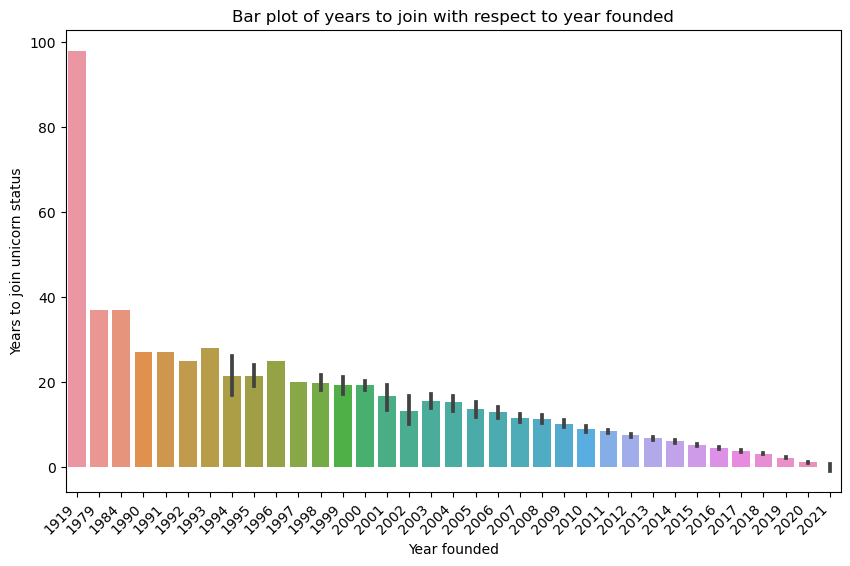

In [27]:
# Set the size of the plot.

### YOUR CODE HERE ###

plt.figure(figsize=(10,6))


# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.

### YOUR CODE HERE ###

sns.barplot(x=df["Year Founded"], y=df["Years To Join"])


# Set title

### YOUR CODE HERE ###

plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label

### YOUR CODE HERE ###

plt.xlabel("Year founded")


# Set y-axis label

### YOUR CODE HERE ###

plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

### YOUR CODE HERE ###

plt.show()